# 1. Introduction

## - The five assets 


### BTC-USD (Currency Pair) - Bitcoin / US Dollar
This is a currency pair for BTC (base) and USD (quote). 

### GLD (ETF) - SPDR Gold Shares
This is an exchange-traded fund that tracks the price of gold. It is part of the family of ETFs managed by the company State Street Global Advisors.


### SVXY (ETF) - ProShares Short VIX Short-Term Futures
This is an exchange-traded fund provided by ProShares that provides inverse exposure to the VIX Short-Term Futures Index by taking the first two months of VIX future positions and creating a weighted average maturity of one month.

### ^FTSE (Index) - The Financial Times Stock Exchange 100 Index
This share index tracks the top 100 companies listed on the London Stock Exchange by market capitalization. 

### MGGPX (Mutual Fund) - Morgan Stanley Institutional Fund, Inc. Global Opportunity Portfolio Class A
This is a Class A mutual fund managed by the company Morgan Stanley. 


# 2. Obtain Data

In [1]:
from pandas_datareader import data as pdr
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
from plotly import tools
import plotly.plotly as py
import plotly.graph_objs as go
import datetime as dt
import pandas as pd
import fix_yahoo_finance as yf
tools.set_credentials_file(username='xian.c', api_key='MpqkLzGQuwzGO92tjEbK')
yf.pdr_override() 

In [2]:
start=dt.datetime(2017,1,1)
end=dt.datetime(2017,12,31)

In [3]:
df1 = pdr.get_data_yahoo(['^GSPC','GLD','BTC-USD', 'SVXY','^FTSE','MGGPX'], start, end)

[*********************100%***********************]  6 of 6 downloaded


In [4]:
df1.head()

Open                                              \
                BTC-USD         GLD  MGGPX        SVXY        ^FTSE   
Date                                                                  
2017-01-01   963.380005         NaN    NaN         NaN          NaN   
2017-01-02   995.440002         NaN    NaN         NaN          NaN   
2017-01-03  1017.049988  109.620003  15.10  189.419998  7142.799805   
2017-01-04  1033.300049  111.059998  15.21  197.100006  7177.899902   
2017-01-05  1135.410034  112.160004  15.39  203.220001  7189.700195   

                                High                                 \
                  ^GSPC      BTC-USD         GLD  MGGPX        SVXY   
Date                                                                  
2017-01-01          NaN  1001.609985         NaN    NaN         NaN   
2017-01-02          NaN  1031.680054         NaN    NaN         NaN   
2017-01-03  2251.570068  1035.469971  111.000000  15.10  195.300003   
2017-01-04  2261.600098  1148.540039  111.220001  15.21  207.059998   
2017-01-05  2268.179932  1150.630005  112.940002  15.39  205.979996   

                ...       Adj Close                                        \
                ...           MGGPX        SVXY        ^FTSE        ^GSPC   
Date            ...                                                         
2017-01-01      ...             NaN         NaN          NaN          NaN   
2017-01-02      ...             NaN         NaN          NaN          NaN   
2017-01-03      ...       14.936665  194.899994  7177.899902  2257.830078   
2017-01-04      ...       15.045474  205.059998  7189.700195  2270.750000   
2017-01-05      ...       15.223528  205.720001  7195.299805  2269.000000   

               Volume                                                         
              BTC-USD        GLD MGGPX       SVXY        ^FTSE         ^GSPC  
Date                                                                          
2017-01-01   40570922        NaN   NaN        NaN          NaN           NaN  
2017-01-02   66038073        NaN   NaN        NaN          NaN           NaN  
2017-01-03   56085870  7527400.0   0.0  1820700.0  795658400.0  3.770530e+09  
2017-01-04  170584623  4904100.0   0.0  1406700.0  742050400.0  3.764890e+09  
2017-01-05  244839289  9606800.0   0.0  1034000.0  768721000.0  3.761820e+09  

[5 rows x 36 columns]

In [5]:
# Filters only for Adj Close
df=df1[['Adj Close']]

In [6]:
# Display the first five rows
df.head()

Adj Close                                                  \
                BTC-USD         GLD      MGGPX        SVXY        ^FTSE   
Date                                                                      
2017-01-01   995.440002         NaN        NaN         NaN          NaN   
2017-01-02  1017.049988         NaN        NaN         NaN          NaN   
2017-01-03  1033.300049  110.470001  14.936665  194.899994  7177.899902   
2017-01-04  1135.410034  110.860001  15.045474  205.059998  7189.700195   
2017-01-05   989.349976  112.580002  15.223528  205.720001  7195.299805   

                         
                  ^GSPC  
Date                     
2017-01-01          NaN  
2017-01-02          NaN  
2017-01-03  2257.830078  
2017-01-04  2270.750000  
2017-01-05  2269.000000

In [7]:
# Display the last five rows
df.tail()

Adj Close                                                  \
                 BTC-USD         GLD      MGGPX        SVXY        ^FTSE   
Date                                                                       
2017-12-27  15416.639648  122.230003  22.088345  513.559998  7620.700195   
2017-12-28  14398.700195  122.849998  22.157866  521.919983  7622.899902   
2017-12-29  14392.570313  123.650002  22.128073  512.840027  7687.799805   
2017-12-30  12531.519531         NaN        NaN         NaN          NaN   
2017-12-31  13850.400391         NaN        NaN         NaN          NaN   

                         
                  ^GSPC  
Date                     
2017-12-27  2682.620117  
2017-12-28  2687.540039  
2017-12-29  2673.610107  
2017-12-30          NaN  
2017-12-31          NaN

In [8]:
# Display the total count
df.count()

Adj Close  BTC-USD    364
           GLD        251
           MGGPX      251
           SVXY       251
           ^FTSE      252
           ^GSPC      251
dtype: int64

# 3. Daily Percent Change 

In [9]:
# calculate daily percentage change
df_dpc=df.pct_change() *100 

In [10]:
#drop nan values
df_dpc=df_dpc.dropna()

In [11]:
#check for nan
df_dpc.isnull().values.any()

False

In [13]:
#Display the first five rows
df_dpc.head()

Adj Close                                                  
              BTC-USD       GLD     MGGPX      SVXY     ^FTSE     ^GSPC
Date                                                                   
2017-01-04   9.881930  0.353037  0.728469  5.212932  0.164398  0.572227
2017-01-05 -12.864080  1.551507  1.183439  0.321858  0.077884 -0.077067
2017-01-06 -10.430081 -0.737255  0.844699  1.351351  0.205694  0.351696
2017-01-09  -0.119881  0.823264  0.064434  0.201438  0.384179 -0.354859
2017-01-10   0.510121  0.426026  0.064386  0.660542  0.520879  0.000000

In [12]:
#Display the last five rows
df_dpc.tail()

Adj Close                                                  
              BTC-USD       GLD     MGGPX      SVXY     ^FTSE     ^GSPC
Date                                                                   
2017-12-21  -5.041016  0.141501  0.225937  0.689708  1.047146  0.198566
2017-12-22 -12.584028  0.523651  0.180342 -0.569530 -0.148603 -0.045817
2017-12-27  -2.157323  0.377766  0.225331 -0.542255  0.368775  0.079094
2017-12-28  -6.602862  0.507236  0.314741  1.627850  0.028865  0.183400
2017-12-29  -0.042572  0.651204 -0.134458 -1.739722  0.851381 -0.518315

In [14]:
# Display the total count
df_dpc.count()

Adj Close  BTC-USD    246
           GLD        246
           MGGPX      246
           SVXY       246
           ^FTSE      246
           ^GSPC      246
dtype: int64

# 4. Plotting

In [15]:
trace1=go.Ohlc(x=df1.index,
              open=df1[('Open', 'BTC-USD')],
              high=df1[('High', 'BTC-USD')],
              low=df1[('Low', 'BTC-USD')],
              close=df1[ ('Close', 'BTC-USD')])
trace2=go.Ohlc(x=df1.index,
              open=df1[('Open', 'GLD')],
              high=df1[('High', 'GLD')],
              low=df1[('Low', 'GLD')],
              close=df1[('Close', 'GLD')])
trace3=go.Ohlc(x=df1.index,
              open=df1[('Open', 'SVXY')],
              high=df1[('High', 'SVXY')],
              low=df1[('Low', 'SVXY')],
              close=df1[('Close', 'SVXY')])
trace4=go.Ohlc(x=df1.index,
              open=df1[('Open', '^FTSE')],
              high=df1[('High', '^FTSE')],
              low=df1[('Low', '^FTSE')],
              close=df1[('Close', '^FTSE')])
trace5=go.Ohlc(x=df1.index,
              open=df1[('Open', 'MGGPX')],
              high=df1[('High', 'MGGPX')],
              low=df1[('Low', 'MGGPX')],
              close=df1[('Close', 'MGGPX')])
trace6=go.Ohlc(x=df1.index,
              open=df1[('Open', '^GSPC')],
              high=df1[('High', '^GSPC')],
              low=df1[('Low', '^GSPC')],
              close=df1[('Close', '^GSPC')])

In [16]:
fig=tools.make_subplots(rows=3,cols=2,subplot_titles=('Bitcoin USD','GOLD',
                                                      'ProShares Short VIX Short-Term Futures',
                                                      'FTSE100 Index',
                                                      'Morgan Stanley Inst Global Opp A',
                                                      'S&P500 Index'))
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 2, 1)
fig.append_trace(trace4, 2, 2)
fig.append_trace(trace5, 3, 1)
fig.append_trace(trace6, 3, 2)

fig['layout'].update(height=800, width=1000, title='Candlestick Charts',
                     xaxis = dict(rangeslider = dict(visible = False)),
                     xaxis2 = dict(rangeslider = dict(visible = False)),
                     xaxis3 = dict(rangeslider = dict(visible = False)),
                     xaxis4 = dict(rangeslider = dict(visible = False)),
                     xaxis5 = dict(rangeslider = dict(visible = False)),
                     xaxis6 = dict(rangeslider = dict(visible = False)))

py.iplot(fig, filename='CIS9650_project')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]
[ (3,1) x5,y5 ]  [ (3,2) x6,y6 ]



# 5. Calculate and explain the statistical summary


## - Which day was min? Which day was max?

In [17]:
# Dates with maximum and minimum values
print('BTC-USD')
print(str(df[('Adj Close', 'BTC-USD')].idxmax())[0:11]+
      str(df[('Adj Close', 'BTC-USD')][df[('Adj Close', 'BTC-USD')].idxmax()]))
print(str(df[('Adj Close', 'BTC-USD')].idxmin())[0:11]+
      str(df[('Adj Close', 'BTC-USD')][df[('Adj Close', 'BTC-USD')].idxmin()]))

print('GLD')
print(str(df[('Adj Close', 'GLD')].idxmax())[0:11]+
      str(df[('Adj Close', 'GLD')][df[('Adj Close', 'GLD')].idxmax()]))
print(str(df[('Adj Close', 'GLD')].idxmin())[0:11]+
      str(df[('Adj Close', 'GLD')][df[('Adj Close', 'GLD')].idxmin()]))

print('SVXY')
print(str(df[('Adj Close', 'SVXY')].idxmax())[0:11]+
      str(df[('Adj Close', 'SVXY')][df[('Adj Close', 'SVXY')].idxmax()]))
print(str(df[('Adj Close', 'SVXY')].idxmin())[0:11]+
      str(df[('Adj Close', 'SVXY')][df[('Adj Close', 'SVXY')].idxmin()]))

print('^FTSE')
print(str(df[('Adj Close', '^FTSE')].idxmax())[0:11]+
      str(df[('Adj Close', '^FTSE')][df[('Adj Close', '^FTSE')].idxmax()]))
print(str(df[('Adj Close', '^FTSE')].idxmin())[0:11]+
      str(df[('Adj Close', '^FTSE')][df[('Adj Close', '^FTSE')].idxmin()]))

print('MGGPX')
print(str(df[('Adj Close', 'MGGPX')].idxmax())[0:11]+
      str(df[('Adj Close', 'MGGPX')][df[('Adj Close', 'MGGPX')].idxmax()]))
print(str(df[('Adj Close', 'MGGPX')].idxmin())[0:11]+
      str(df[('Adj Close', 'MGGPX')][df[('Adj Close', 'MGGPX')].idxmin()]))

print('^GSPC')
print(str(df[('Adj Close', '^GSPC')].idxmax())[0:11]+
      str(df[('Adj Close', '^GSPC')][df[('Adj Close', '^GSPC')].idxmax()]))
print(str(df[('Adj Close', '^GSPC')].idxmin())[0:11]+
      str(df[('Adj Close', '^GSPC')][df[('Adj Close', '^GSPC')].idxmin()]))

BTC-USD
2017-12-16 19345.490234
2017-01-11 785.429993
GLD
2017-09-07 128.130005
2017-01-03 110.470001
SVXY
2017-12-28 521.919983
2017-01-03 194.899994
^FTSE
2017-12-29 7687.799805
2017-01-31 7099.200195
MGGPX
2017-12-28 22.157866
2017-01-03 14.936665
^GSPC
2017-12-18 2690.159912
2017-01-03 2257.830078


In [32]:
# Date with the largest percentage change
print('BTC-USD')
print(str(df_dpc[('Adj Close', 'BTC-USD')].idxmax())[0:11]+
      str(df_dpc[('Adj Close', 'BTC-USD')][df_dpc[('Adj Close', 'BTC-USD')].idxmax()]))

print('GLD')
print(str(df_dpc[('Adj Close', 'GLD')].idxmax())[0:11]+
      str(df_dpc[('Adj Close', 'GLD')][df_dpc[('Adj Close', 'GLD')].idxmax()]))

print('SVXY')
print(str(df_dpc[('Adj Close', 'SVXY')].idxmax())[0:11]+
      str(df_dpc[('Adj Close', 'SVXY')][df_dpc[('Adj Close', 'SVXY')].idxmax()]))

print('^FTSE')
print(str(df_dpc[('Adj Close', '^FTSE')].idxmax())[0:11]+
      str(df_dpc[('Adj Close', '^FTSE')][df_dpc[('Adj Close', '^FTSE')].idxmax()]))

print('MGGPX')
print(str(df_dpc[('Adj Close', 'MGGPX')].idxmax())[0:11]+
      str(df_dpc[('Adj Close', 'MGGPX')][df_dpc[('Adj Close', 'MGGPX')].idxmax()]))

print('^GSPC')
print(str(df_dpc[('Adj Close', '^GSPC')].idxmax())[0:11]+
      str(df_dpc[('Adj Close', '^GSPC')][df_dpc[('Adj Close', '^GSPC')].idxmax()]))


BTC-USD
2017-07-19 25.5605464896
GLD
2017-03-15 1.86645368385
SVXY
2017-08-14 12.7511153294
^FTSE
2017-04-24 2.10974749013
MGGPX
2017-10-27 1.69971720065
^GSPC
2017-03-01 1.36738545054


## - Range, Standard deviation, etc…

In [18]:
df_dpc.describe()

Adj Close                                                            
          BTC-USD         GLD       MGGPX        SVXY       ^FTSE       ^GSPC
count  246.000000  246.000000  246.000000  246.000000  246.000000  246.000000
mean     0.745980    0.043440    0.157356    0.403055    0.032649    0.065649
std      5.234098    0.615688    0.556160    3.005873    0.543640    0.419255
min    -16.205761   -1.635317   -1.936044  -18.264092   -2.457832   -1.817821
25%     -1.309305   -0.393989   -0.132652   -0.592587   -0.266377   -0.130358
50%      0.871930    0.124270    0.142307    0.441691    0.027722    0.055622
75%      3.323538    0.418306    0.529289    1.853505    0.381236    0.241744
max     25.560546    1.866454    1.699717   12.751115    2.109747    1.367385

# 6. Regression Anaylsis
- SP500 is independent variable and assets are dependent variables
- Display each regression as a subplot in one figure
- Calculate and explain the intercept, coefficient (slope), R2, and the Mean squared error.



In [19]:
import statsmodels
import statsmodels.formula.api as smf

In [20]:
ds=pd.DataFrame()

In [21]:
ds['btc']=df_dpc[('Adj Close', 'BTC-USD')]
ds['gld']=df_dpc[('Adj Close', 'GLD')]
ds['svxy']=df_dpc[('Adj Close', 'SVXY')]
ds['ftse']=df_dpc[('Adj Close', '^FTSE')]
ds['mggpx']=df_dpc[('Adj Close', 'MGGPX')]
ds['sp500']=df_dpc[('Adj Close', '^GSPC')]

### 1. BTC-USD

In [22]:
model1=smf.ols(formula='btc~sp500',data=ds)
r1=model1.fit()
print(r1.summary())

                            OLS Regression Results                            
Dep. Variable:                    btc   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                   0.07140
Date:                Tue, 18 Dec 2018   Prob (F-statistic):              0.790
Time:                        01:02:06   Log-Likelihood:                -755.70
No. Observations:                 246   AIC:                             1515.
Df Residuals:                     244   BIC:                             1522.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7320      0.338      2.163      0.0

In [23]:
print('MSE:',r1.mse_resid)

MSE: 27.5000080578


### 2. GLD

In [24]:
model2=smf.ols(formula='gld~sp500',data=ds)
r2=model2.fit()
print(r2.summary())

                            OLS Regression Results                            
Dep. Variable:                    gld   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     17.07
Date:                Tue, 18 Dec 2018   Prob (F-statistic):           4.96e-05
Time:                        01:02:13   Log-Likelihood:                -220.93
No. Observations:                 246   AIC:                             445.9
Df Residuals:                     244   BIC:                             452.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0681      0.038      1.769      0.0

In [25]:
print('MSE:',r2.mse_resid)

MSE: 0.3557395234


### 3. SVXY

In [26]:
model3=smf.ols(formula='svxy~sp500',data=ds)
r3=model3.fit()
print(r3.summary())

                            OLS Regression Results                            
Dep. Variable:                   svxy   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     328.6
Date:                Tue, 18 Dec 2018   Prob (F-statistic):           4.25e-47
Time:                        01:02:20   Log-Likelihood:                -514.37
No. Observations:                 246   AIC:                             1033.
Df Residuals:                     244   BIC:                             1040.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0465      0.127      0.366      0.7

In [27]:
print('MSE:',r3.mse_resid)

MSE: 3.8657427036


### 4. ^FTSE

In [28]:
model4=smf.ols(formula='ftse~sp500',data=ds)
r4=model4.fit()
print(r4.summary())

                            OLS Regression Results                            
Dep. Variable:                   ftse   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     65.34
Date:                Tue, 18 Dec 2018   Prob (F-statistic):           2.93e-14
Time:                        01:02:33   Log-Likelihood:                -169.44
No. Observations:                 246   AIC:                             342.9
Df Residuals:                     244   BIC:                             349.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0065      0.031     -0.207      0.8

In [29]:
print('MSE:',r4.mse_resid)

MSE: 0.234070487512


### 5. MGGPX

In [30]:
model5=smf.ols(formula='mggpx~sp500',data=ds)
r5=model5.fit()
print(r5.summary())

                            OLS Regression Results                            
Dep. Variable:                  mggpx   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     167.6
Date:                Tue, 18 Dec 2018   Prob (F-statistic):           1.57e-29
Time:                        01:02:38   Log-Likelihood:                -139.91
No. Observations:                 246   AIC:                             283.8
Df Residuals:                     244   BIC:                             290.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1018      0.028      3.676      0.0

In [31]:
print('MSE:',r5.mse_resid)

MSE: 0.184112241011


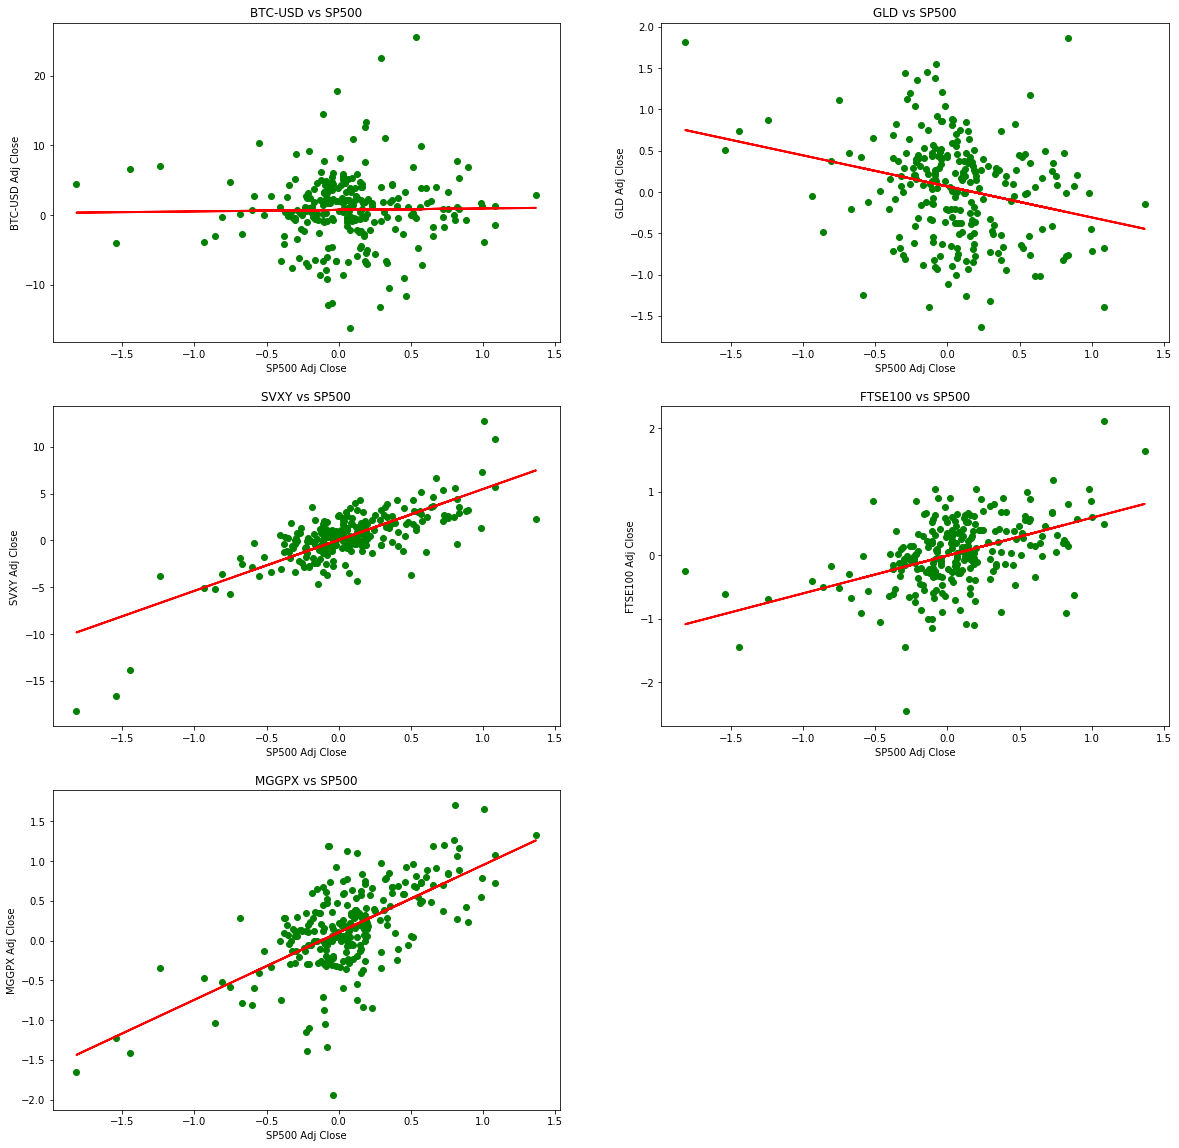

In [32]:
%matplotlib inline
fig, ax = plt.subplots(3,2,figsize = (20,20))

ax[0,0].scatter(df_dpc[('Adj Close', '^GSPC')],df_dpc[('Adj Close', 'BTC-USD')],color='green')
ax[0,0].plot(ds['sp500'],r1.fittedvalues,color='red',linewidth=2)
ax[0,0].set_xlabel('SP500 Adj Close')
ax[0,0].set_ylabel('BTC-USD Adj Close')
ax[0,0].set_title('BTC-USD vs SP500')

ax[0,1].scatter(df_dpc[('Adj Close', '^GSPC')],df_dpc[('Adj Close', 'GLD')],color='green')
ax[0,1].plot(ds['sp500'],r2.fittedvalues,color='red',linewidth=2)
ax[0,1].set_ylabel('GLD Adj Close')
ax[0,1].set_xlabel('SP500 Adj Close')
ax[0,1].set_title('GLD vs SP500')

ax[1,0].scatter(df_dpc[('Adj Close', '^GSPC')],df_dpc[('Adj Close', 'SVXY')],color='green')
ax[1,0].plot(ds['sp500'],r3.fittedvalues,color='red',linewidth=2)
ax[1,0].set_ylabel('SVXY Adj Close')
ax[1,0].set_xlabel('SP500 Adj Close')
ax[1,0].set_title('SVXY vs SP500')

ax[1,1].scatter(df_dpc[('Adj Close', '^GSPC')],df_dpc[('Adj Close', '^FTSE')],color='green')
ax[1,1].plot(ds['sp500'],r4.fittedvalues,color='red',linewidth=2)
ax[1,1].set_ylabel('FTSE100 Adj Close')
ax[1,1].set_xlabel('SP500 Adj Close')
ax[1,1].set_title('FTSE100 vs SP500')

ax[2,0].scatter(df_dpc[('Adj Close', '^GSPC')],df_dpc[('Adj Close', 'MGGPX')],color='green')
ax[2,0].plot(ds['sp500'],r5.fittedvalues,color='red',linewidth=2)
ax[2,0].set_ylabel('MGGPX Adj Close')
ax[2,0].set_xlabel('SP500 Adj Close')
ax[2,0].set_title('MGGPX vs SP500')

ax[2,1].remove()